In [3]:
import sys
import os
sys.path.insert(0, r"C:\Users\Yarden\Computer Science\Masters\1\Advance Machine Learning\final project\src")

In [4]:
from utils import DataUtils
from TCK import TCK
from GMM_MAP_EM import GMM_MAP_EM

from pathlib import Path
import numpy as np
import pickle

from sklearn.metrics import accuracy_score
from sklearn.decomposition import KernelPCA
import matplotlib.pyplot as plt

In [5]:
root_path = Path(r"..\..\..\.")
data_path = root_path / "data"
models_path = root_path / "models"

In [6]:
def run_evaluation(dataset_name, tck_model_args):
    similarity_function = tck_model_args['similarity_function']
    C = tck_model_args['C']
    Q = tck_model_args['Q']
    single_gmm_num_iter = tck_model_args['single_gmm_num_iter']
    max_features = tck_model_args['max_features']
    
    model_name = f"similarity_function-{similarity_function}_C-{C}_Q-{Q}_single_gmm_num_iter-{single_gmm_num_iter}_max_features-{max_features}"
    path = models_path / dataset_name / model_name
    X_train, X_test, y_train, y_test = DataUtils.load_numpy_array(data_path / dataset_name)
    with open(path / "model", "rb") as fis:
        tck_model = pickle.loads(fis.read())

    K_star = np.load(path / "K_Star.npy")
    
    tck_y_pred = y_train[K_star.T.argmax(axis=1)].astype(int)
    accuracy = accuracy_score(y_test, tck_y_pred)
    print(f"accuracy = {accuracy}")
    
    X_pca = KernelPCA(n_components=2, kernel='precomputed').fit_transform(tck_model.K)

    plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_train)
    plt.show()

# Syntetic

accuracy = 0.895


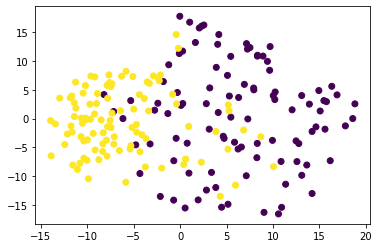

In [5]:
tck_model_args = {}
tck_model_args['similarity_function'] = "linear"
tck_model_args['C'] =  40
tck_model_args['Q'] = 30
tck_model_args['single_gmm_num_iter'] = 20
tck_model_args['max_features'] = 'all'
dataset_name = "Syntetic"

run_evaluation(dataset_name, tck_model_args)

# Pen Digits

accuracy = 0.9012345679012346


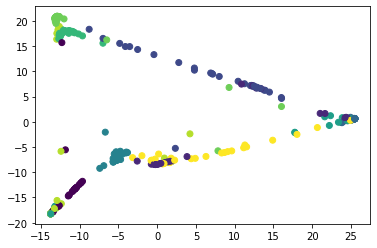

In [7]:
tck_model_args = {}
tck_model_args['similarity_function'] = "linear"
tck_model_args['C'] =  40
tck_model_args['Q'] = 30
tck_model_args['single_gmm_num_iter'] = 20
tck_model_args['max_features'] = 'all'
dataset_name = "PenDigits"

run_evaluation(dataset_name, tck_model_args)

# Arabic Digits

accuracy = 0.9522510231923602


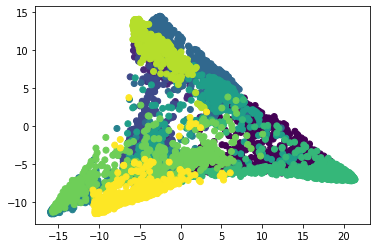

In [7]:
tck_model_args = {}
tck_model_args['similarity_function'] = "linear"
tck_model_args['C'] =  40
tck_model_args['Q'] = 30
tck_model_args['single_gmm_num_iter'] = 20
tck_model_args['max_features'] = 'all'
dataset_name = "ArabicDigits"

run_evaluation(dataset_name, tck_model_args)

# Wisdom

accuracy = 0.9007383100902379


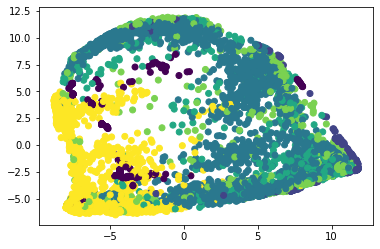

In [11]:
tck_model_args = {}
tck_model_args['similarity_function'] = "linear"
tck_model_args['C'] =  20
tck_model_args['Q'] = 20
tck_model_args['single_gmm_num_iter'] = 20
tck_model_args['max_features'] = 'all'
dataset_name = "Wisdom"

run_evaluation(dataset_name, tck_model_args)